In [38]:
# Pandas is a library for basic data analysis
import pandas as pd
# NumPy is a library for advanced mathematical computation
import numpy as np
# MatPlotLib is a library for basic data visualization
import matplotlib.pyplot as plt
# SeaBorn is a library for advanced data visualization
import seaborn as sns
##CSS for column stylization?
sns.set(style="white", context="notebook", palette="deep")
COLOR_COLUMNS = ["#66C2FF", "#5CD6D6", "#00CC99", "#85E085", "#FFD966", "#FFB366", "#FFB3B3", "#DAB3FF", "#C2C2D6"]
sns.set_palette(palette=COLOR_COLUMNS, n_colors=4)

FILEPATH = "/Users/cherishspikes/Data_science/tutorials/AppleStore.csv"
df = pd.read_csv(FILEPATH, index_col="Unnamed: 0")
df
#drop currency
# NOTE: Running this multiple times will throw errors.
df = df.drop("currency", axis="columns")
#resize bites to clean up data with custom helper function
#define function
def _byte_resizer(data):
    return np.around(data / 1000000, decimals=2)
#apply function to size bytes column and store in size mb
df["size_Mb"] = df["size_bytes"].apply(_byte_resizer)
#drop the size bytes/old column
df.drop("size_bytes", axis="columns", inplace=True)

In [32]:
df.iloc[0]

id                        281656475
track_name          PAC-MAN Premium
price                          3.99
rating_count_tot              21292
rating_count_ver                 26
user_rating                     4.0
user_rating_ver                 4.5
ver                           6.3.5
cont_rating                      4+
prime_genre                   Games
sup_devices.num                  38
ipadSc_urls.num                   5
lang.num                         10
vpp_lic                           1
size_Mb                      100.79
Name: 1, dtype: object

In [33]:
df.loc[3]

id                                                        281940292
track_name          WeatherBug - Local Weather, Radar, Maps, Alerts
price                                                           0.0
rating_count_tot                                             188583
rating_count_ver                                               2822
user_rating                                                     3.5
user_rating_ver                                                 4.5
ver                                                           5.0.0
cont_rating                                                      4+
prime_genre                                                 Weather
sup_devices.num                                                  37
ipadSc_urls.num                                                   5
lang.num                                                          3
vpp_lic                                                           1
size_Mb                                         

In [34]:
df.iloc[3]

id                                                          282614216
track_name          eBay: Best App to Buy, Sell, Save! Online Shop...
price                                                             0.0
rating_count_tot                                               262241
rating_count_ver                                                  649
user_rating                                                       4.0
user_rating_ver                                                   4.5
ver                                                            5.10.0
cont_rating                                                       12+
prime_genre                                                  Shopping
sup_devices.num                                                    37
ipadSc_urls.num                                                     5
lang.num                                                            9
vpp_lic                                                             1
size_Mb             

In [35]:
df.price.mean()

1.726217868556343

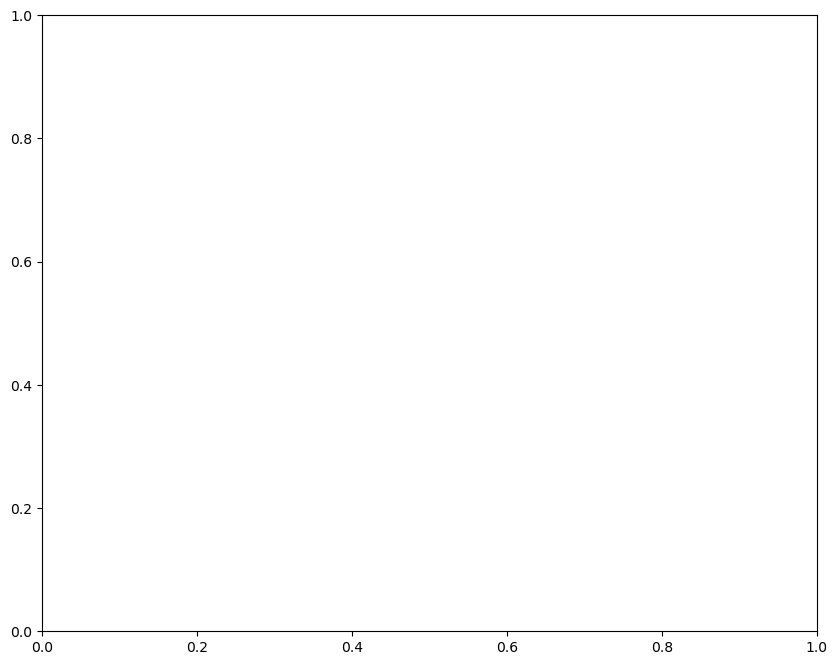

In [36]:
plt.subplots(figsize=(10, 8))
#init bins in which data will fall, notice it grows exponentially
BINS = [0.00, 10.00, 20.00, 50.00, 100.00, 200.00, 500.00, 1000.00, 2000.00, np.inf]
LABELS = ["<10m", "10-20m", "20-50m", "50-100m", "100-200m", "200-500m", "500-1000m", "1-2G", ">2G"]


/Users/cherishspikes/Data_science/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='size_Mb'>

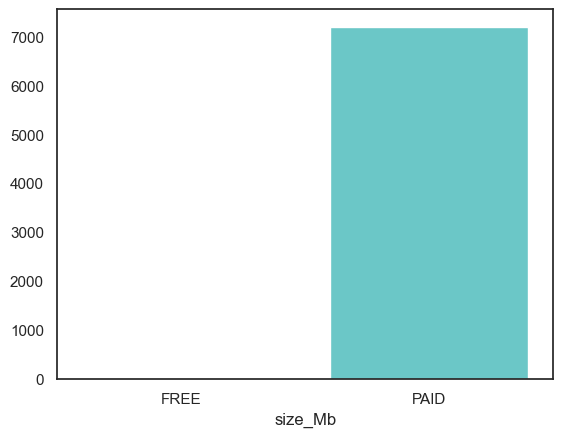

In [44]:
freqs = pd.cut(df["size_Mb"], BINS, include_lowest=True, labels=LABELS)
sns.barplot(y=freqs.value_counts().values, x=freqs.value_counts().index)

In [45]:
## is app paid or free?
BINS = [-np.inf, 0.00, np.inf]
LABELS = ["FREE", "PAID"]
colors = ['lightcoral', 'yellowgreen']

In [46]:

df["price_categories"] = pd.cut(df["price"], BINS, include_lowest=True, labels=LABELS)
#init plot space in matplotlib
fig, axs = plt.subplots(figsize=(10, 5))

(-1.0999999578955515,
 1.0999999979950263,
 -1.0999923936380143,
 1.0999986977713045)

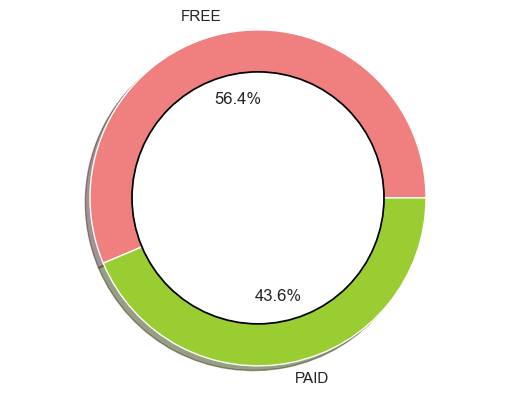

In [48]:
#slice data frame to easily grab data needed
price_df = df["price_categories"].value_counts()
#generate a doughnut plot in matplotlib using standard pie chart
plt.pie(price_df.values, labels=LABELS, colors=colors, autopct='%1.1f%%', shadow=True)
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')

In [49]:
#slice categorical data into two new obj based on cat
free_apps = df.loc[df["price_categories"] == "FREE"]
paid_apps = df.loc[df["price_categories"] == "PAID"]

In [50]:
#slice based on total user ratings
free_apps_rated = free_apps.sort_values(by=["rating_count_tot"], ascending=False)
paid_apps_rated = paid_apps.sort_values(by=["rating_count_tot"], ascending=False)

<Axes: xlabel='rating_count_tot', ylabel='track_name'>

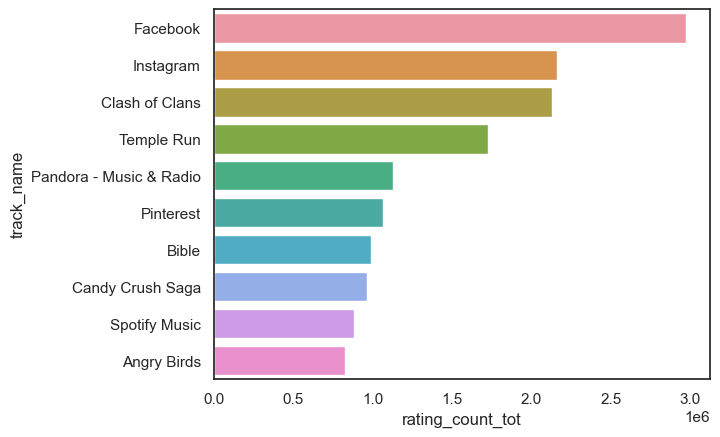

In [51]:
#best free 
sns.barplot(x=free_apps_rated["rating_count_tot"][:10], y=free_apps_rated["track_name"][:10])

<Axes: xlabel='rating_count_tot', ylabel='track_name'>

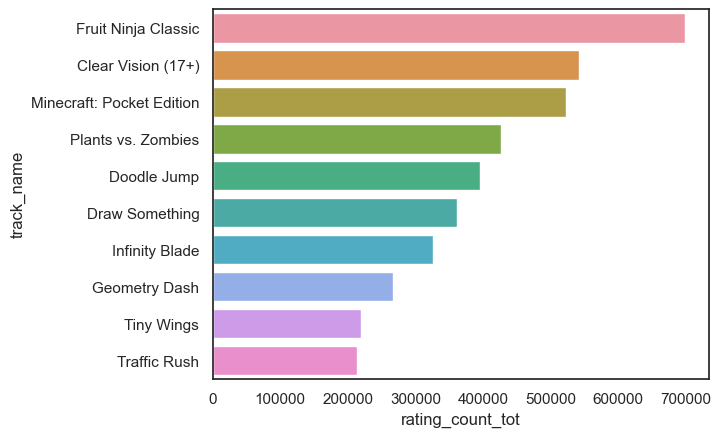

In [52]:
#best paid
sns.barplot(x=paid_apps_rated["rating_count_tot"][:10], y=paid_apps_rated["track_name"][:10])

(<Figure size 2000x2000 with 1 Axes>, <Axes: >)

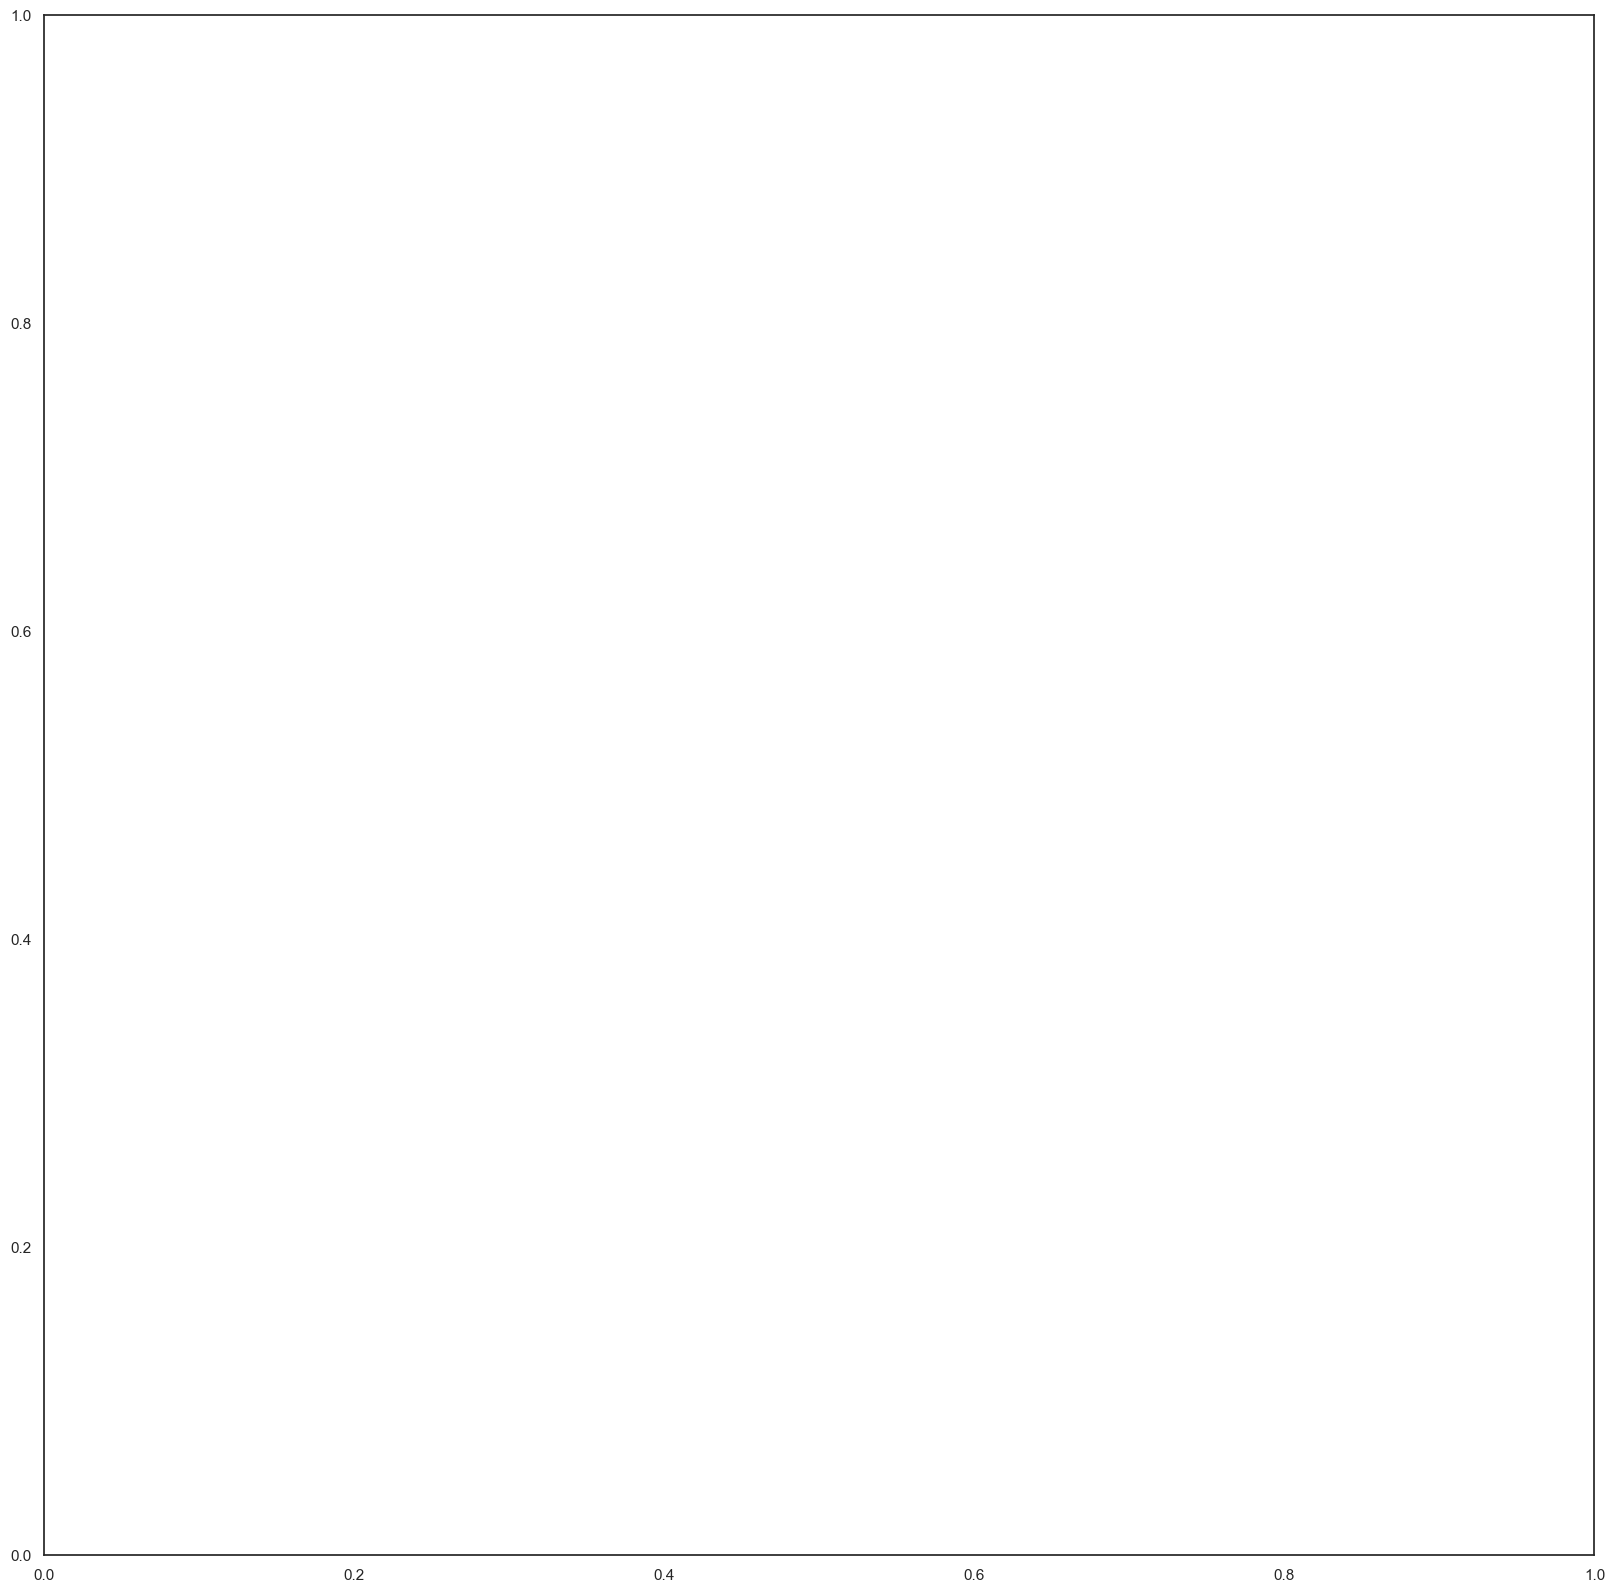

In [53]:
#highest rated apps of all time, regardless of price?
#init plotting space
plt.subplots(figsize=(20, 20))
#

In [54]:
#grab data sorted by ratings as an object
ratings = df.sort_values(by=["rating_count_tot"], ascending=False)

<Axes: xlabel='rating_count_tot', ylabel='track_name'>

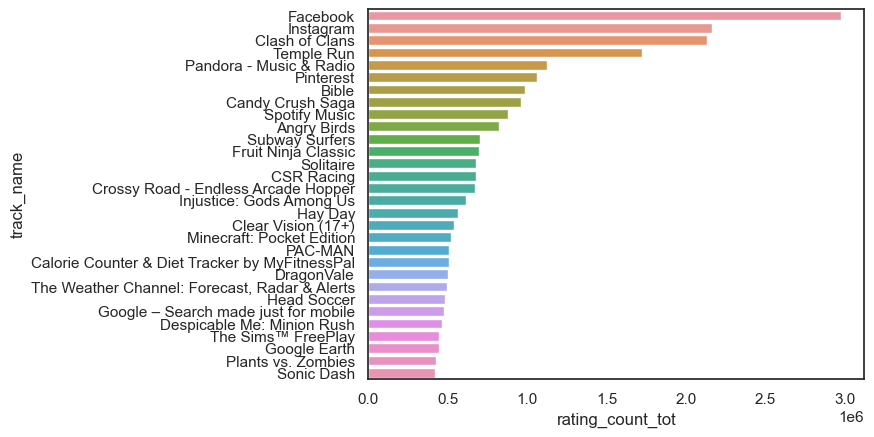

In [55]:
sns.barplot(x=ratings["rating_count_tot"][:30], y=ratings["track_name"][:30])

<Axes: ylabel='prime_genre'>

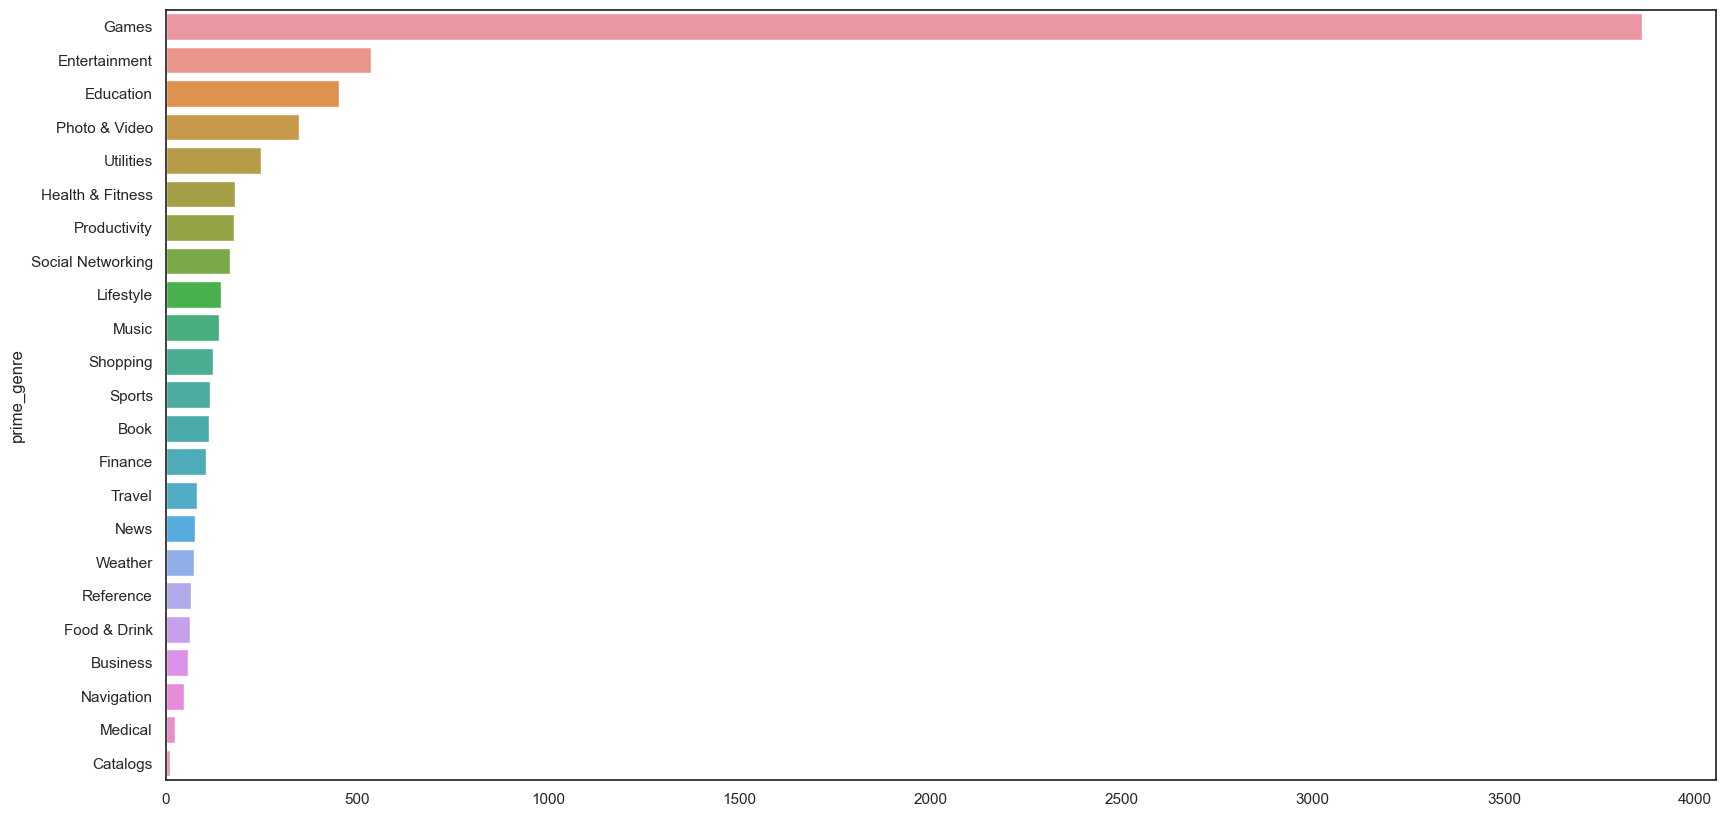

In [56]:
#visualize distribution of apps based on genre 
genres = df["prime_genre"].value_counts()
genres.sort_values(ascending=False, inplace=True)

plt.subplots(figsize=(20, 10))
sns.barplot(x=genres.values, y=genres.index, order=genres.index, orient="h")

In [57]:
#slice data to only get mobile games
games = df.loc[df["prime_genre"] == "Games"]
games.head()

,id,track_name,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_Mb,price_categories
1,281656475,PAC-MAN Premium,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,100.79,PAID
6,283619399,Shanghai Mahjong,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1,10.49,PAID
10,284736660,Ms. PAC-MAN,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1,70.02,PAID
11,284791396,Solitaire by MobilityWare,4.99,76720,4017,4.5,4.5,4.10.1,4+,Games,38,4,11,1,49.62,PAID
12,284815117,SCRABBLE Premium,7.99,105776,166,3.5,2.5,5.19.0,4+,Games,37,0,6,1,227.55,PAID


In [82]:
#mobile game data by price
prices = (games["price"].value_counts()) / (games["price"].shape[0]) * 100
prices.sort_values(ascending=False, inplace=True)


[Text(0.5, 0, 'USD'), Text(0, 0.5, 'percent (%)')]

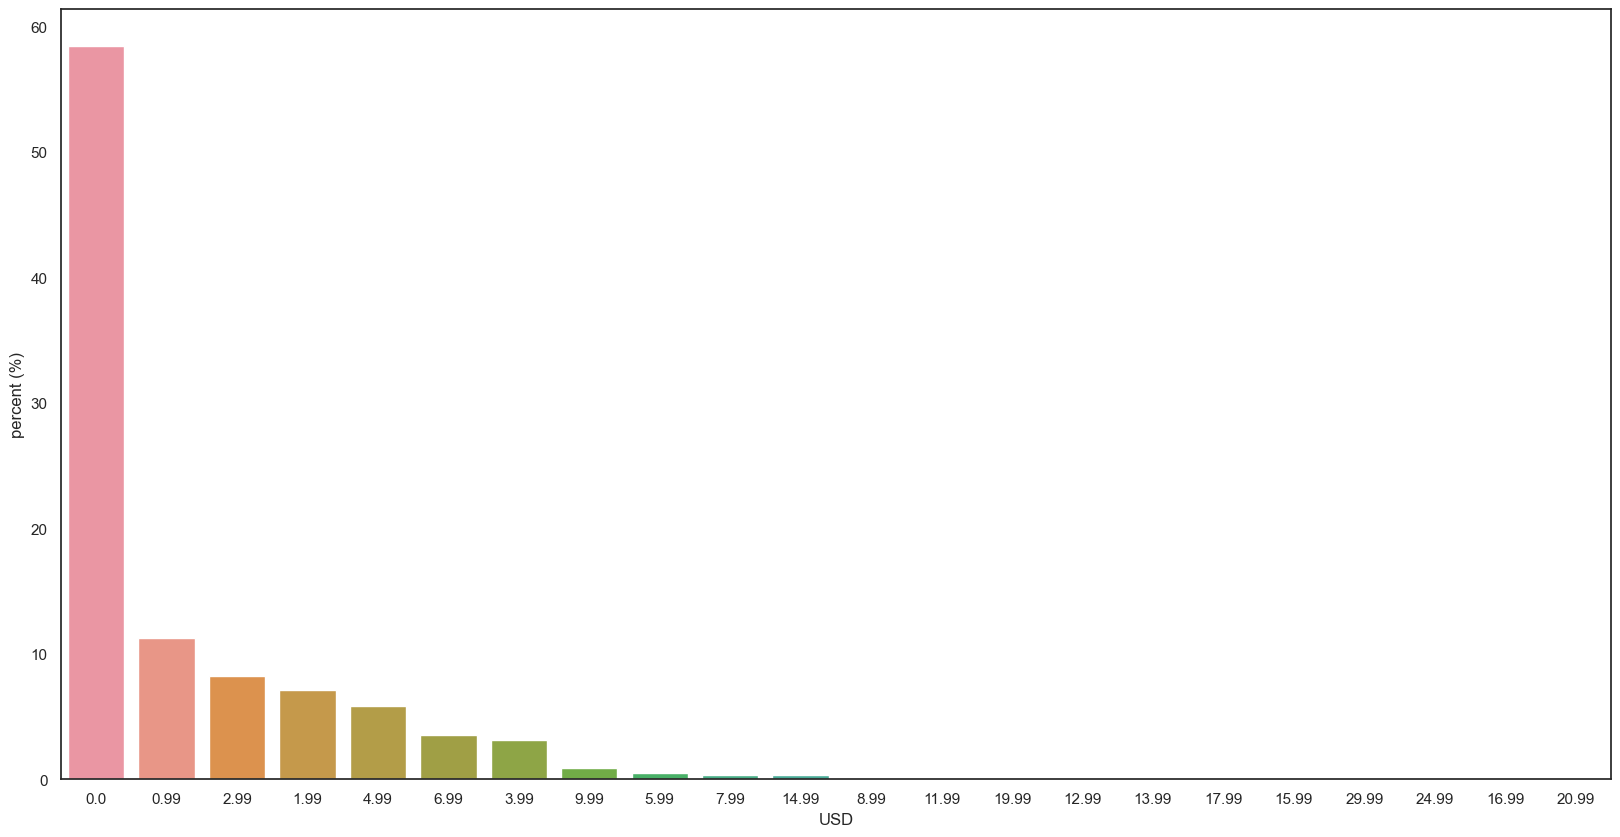

In [83]:
#init plot space and barplot to visualize data
plt.subplots(figsize=(20, 10))
ax = sns.barplot(y=prices.values, x=prices.index, order=prices.index)
ax.set(xlabel="USD", ylabel="percent (%)")

In [86]:
#sort categorical objects by total ratings
free_games = games.loc[games["price_categories"] == "FREE"]
paid_games = games.loc[games["price_categories"] == "PAID"]

free_games_rated = free_games.sort_values(by=["rating_count_tot"], ascending=False)
paid_games_rated = paid_games.sort_values(by=["rating_count_tot"], ascending=False)

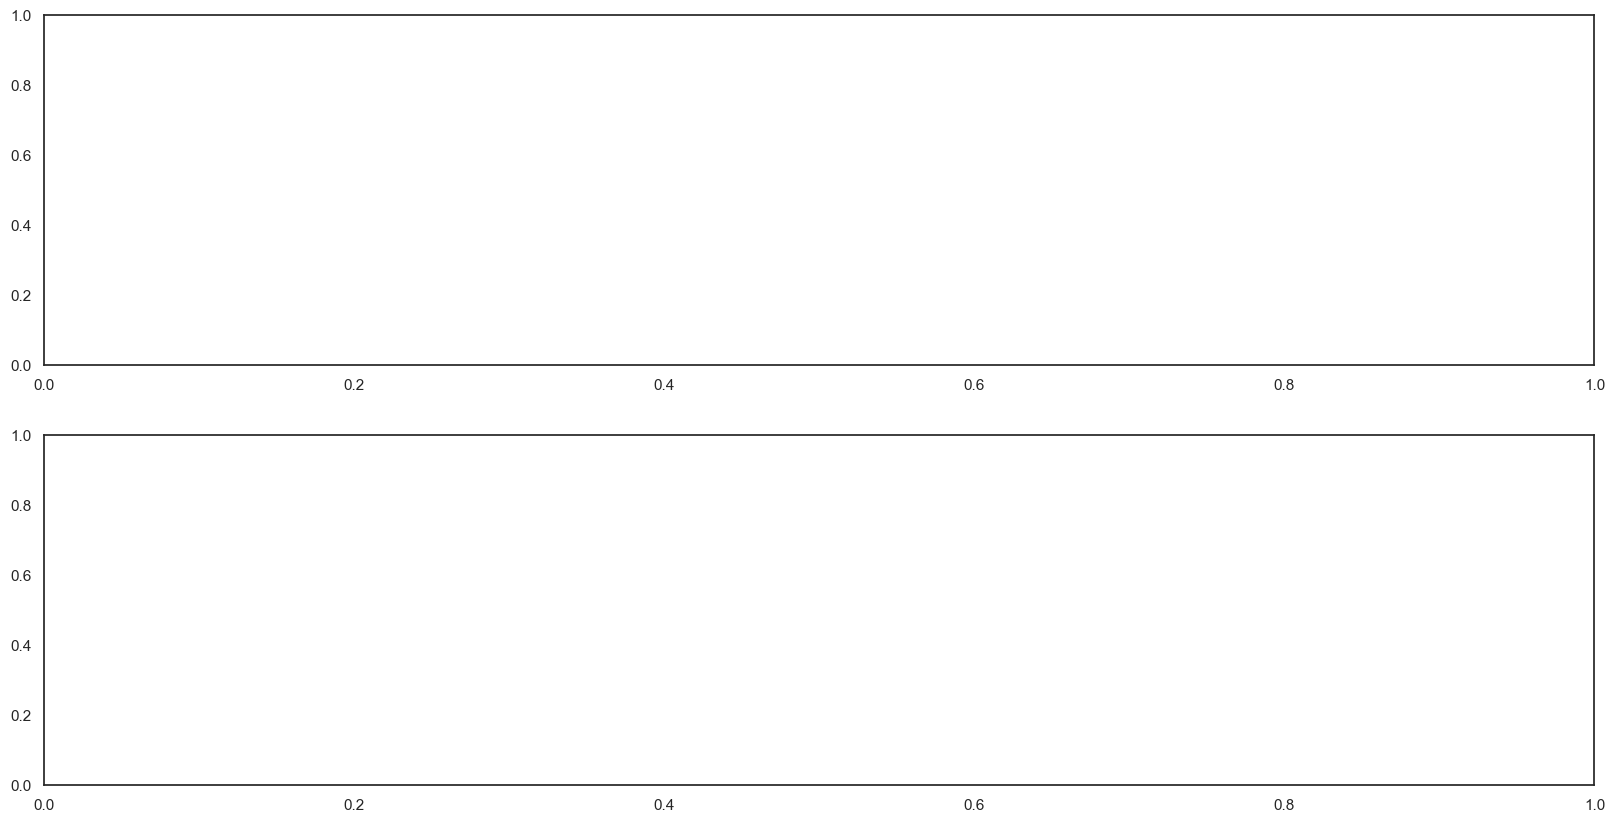

In [88]:
#init plotting space, using subplots to display two plots dynamically
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

In [87]:
sns.barplot(x=free_games_rated["rating_count_tot"][:10], y=free_games_rated["track_name"][:10], ax=ax1)
sns.barplot(x=paid_games_rated["rating_count_tot"][:10], y=paid_games_rated["track_name"][:10], ax=ax2)

<Axes: xlabel='rating_count_tot', ylabel='track_name'>

In [89]:
#save those slices as diff objects
free_games_rated_curr = free_games.sort_values(by=["rating_count_ver"], ascending=False)
paid_games_rated_curr = paid_games.sort_values(by=["rating_count_ver"], ascending=False)

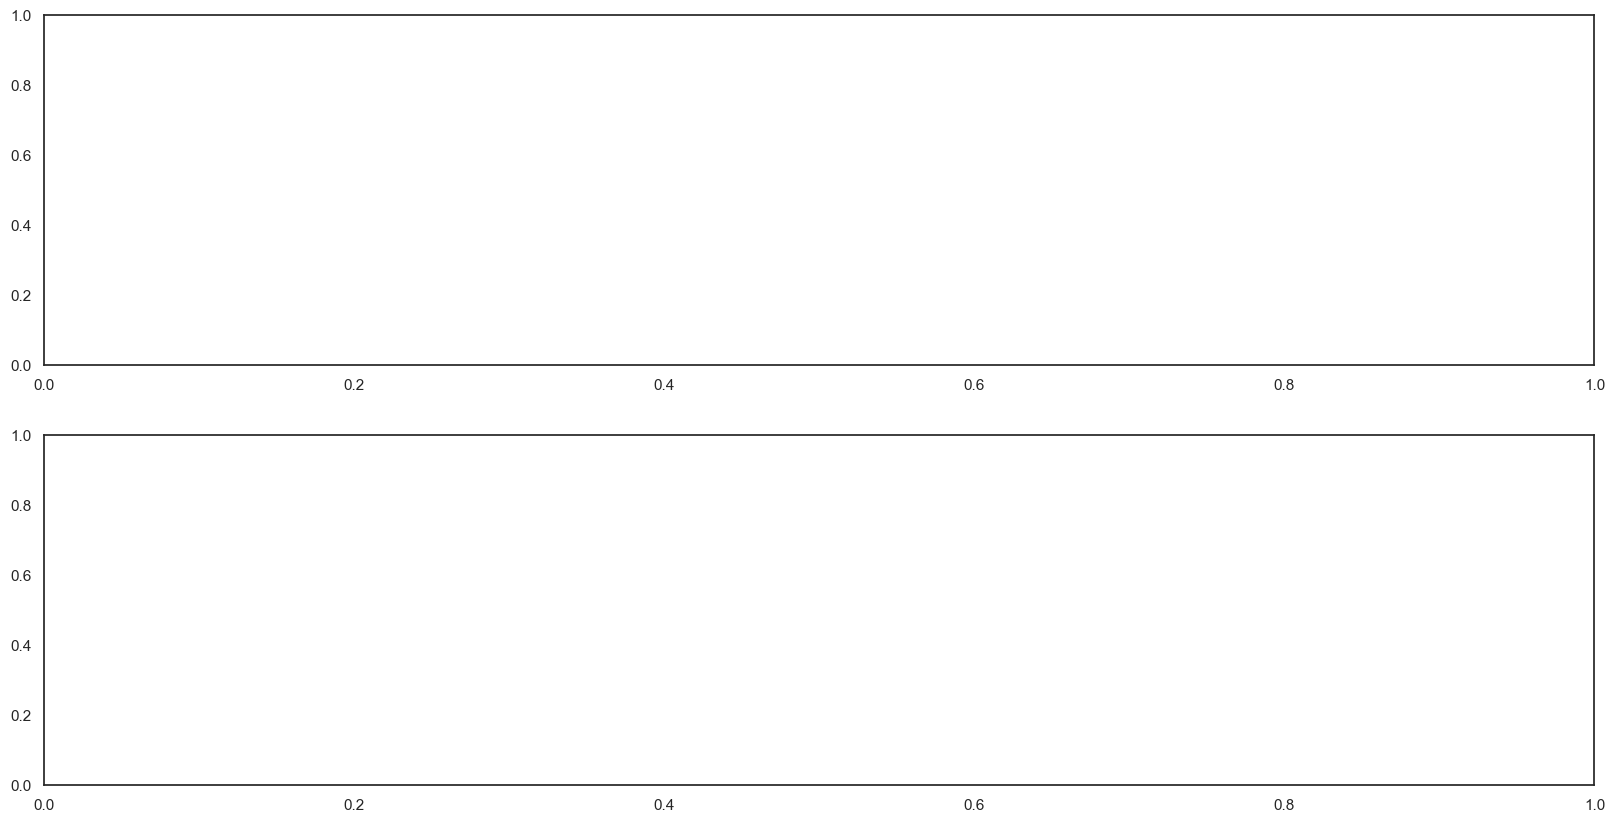

In [90]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

In [91]:
sns.barplot(x=free_games_rated_curr["rating_count_ver"][:10], y=free_games_rated_curr["track_name"][:10], ax=ax1)
sns.barplot(x=paid_games_rated_curr["rating_count_ver"][:10], y=paid_games_rated_curr["track_name"][:10], ax=ax2)

<Axes: xlabel='rating_count_ver', ylabel='track_name'>